# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv(r"Penguins.csv")

## 评估与清理

In [3]:
cleaned_data = original_data.copy()

In [4]:
cleaned_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
118,Adelie,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,MALE
48,Adelie,Dream,36.0,17.9,190.0,3450.0,FEMALE
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,MALE
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
282,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,FEMALE
174,Chinstrap,Dream,43.2,16.6,187.0,2900.0,FEMALE


结构整洁

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


数据缺失
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别
- 前几个缺失量一样

In [7]:
cleaned_data[cleaned_data["culmen_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_data[cleaned_data["culmen_depth_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data[cleaned_data["flipper_length_mm"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_data[cleaned_data["sex"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data[cleaned_data["body_mass_g"].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


由分析目的可知，缺失数据的观察值都可删除

In [12]:
cleaned_data = cleaned_data.dropna()

In [13]:
cleaned_data["species"].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [14]:
cleaned_data["island"].value_counts()

island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

In [15]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

这三个数据类型有误

In [16]:
cleaned_data["species"].astype("category")

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 334, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [17]:
cleaned_data["island"].astype("category")

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: category
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [18]:
cleaned_data["sex"].astype("category")

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: category
Categories (3, object): ['.', 'FEMALE', 'MALE']

In [19]:
cleaned_data[cleaned_data["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [20]:
cleaned_data = cleaned_data.drop(index=336)

In [21]:
cleaned_data = cleaned_data.drop_duplicates()

### 已清洗

In [22]:
sns.set_palette("colorblind")

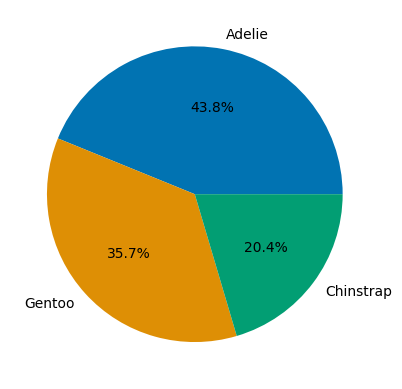

In [23]:
species_counts = cleaned_data["species"].value_counts()
plt.pie(species_counts,labels=species_counts.index,autopct="%.1f%%")
plt.show()

Adelie最多Chinstrap最少

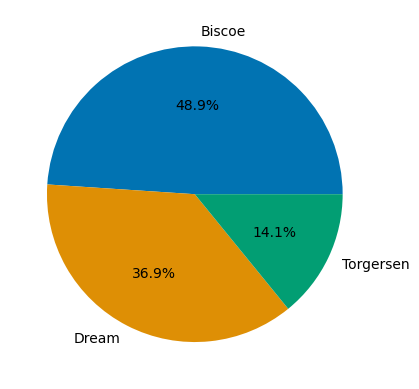

In [24]:
island_counts = cleaned_data["island"].value_counts()
plt.pie(island_counts,labels=island_counts.index,autopct="%.1f%%")
plt.show()

B岛最多企鹅，T岛且最少

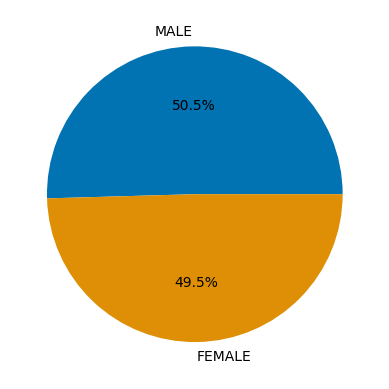

In [25]:
sex_counts = cleaned_data["sex"].value_counts()
plt.pie(sex_counts,labels=sex_counts.index,autopct="%.1f%%")
plt.show()

男女比1：1正常

不同岛上企鹅种类的数量

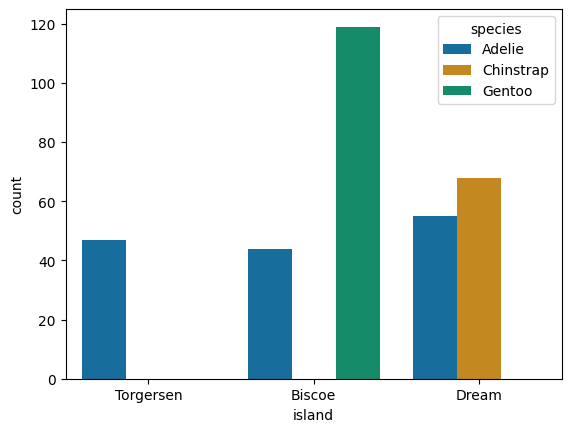

In [26]:
sns.countplot(cleaned_data,x="island",hue="species")
plt.show()

不同岛上企鹅性别的数量

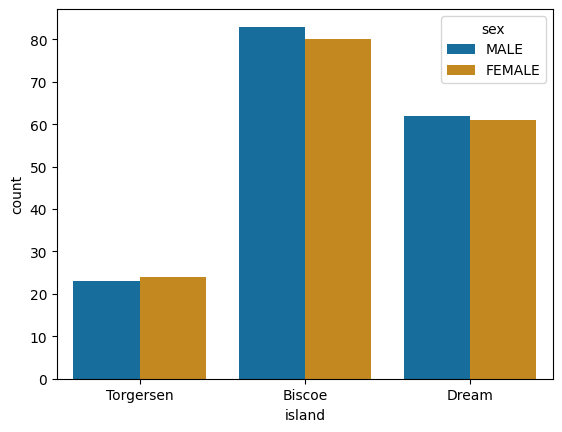

In [27]:
sns.countplot(cleaned_data,x="island",hue="sex")
plt.show()

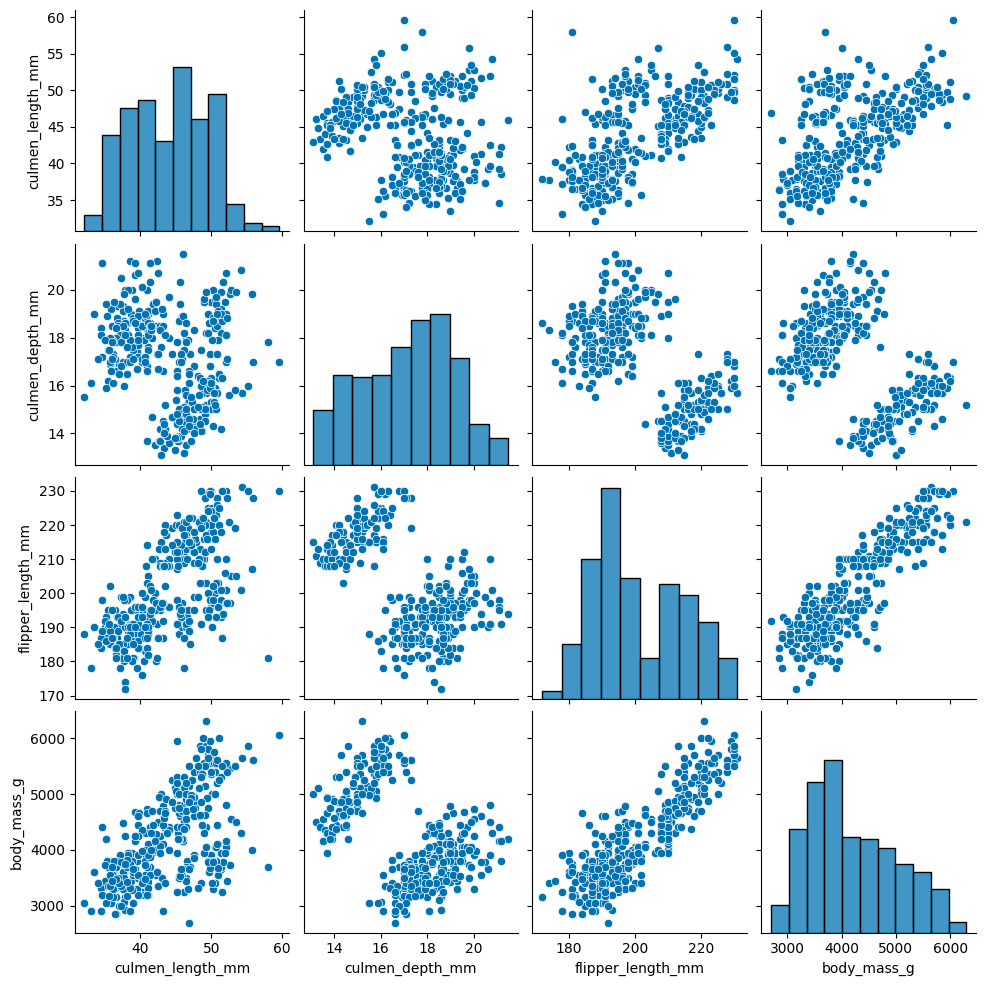

In [29]:
sns.pairplot(cleaned_data)
plt.show()

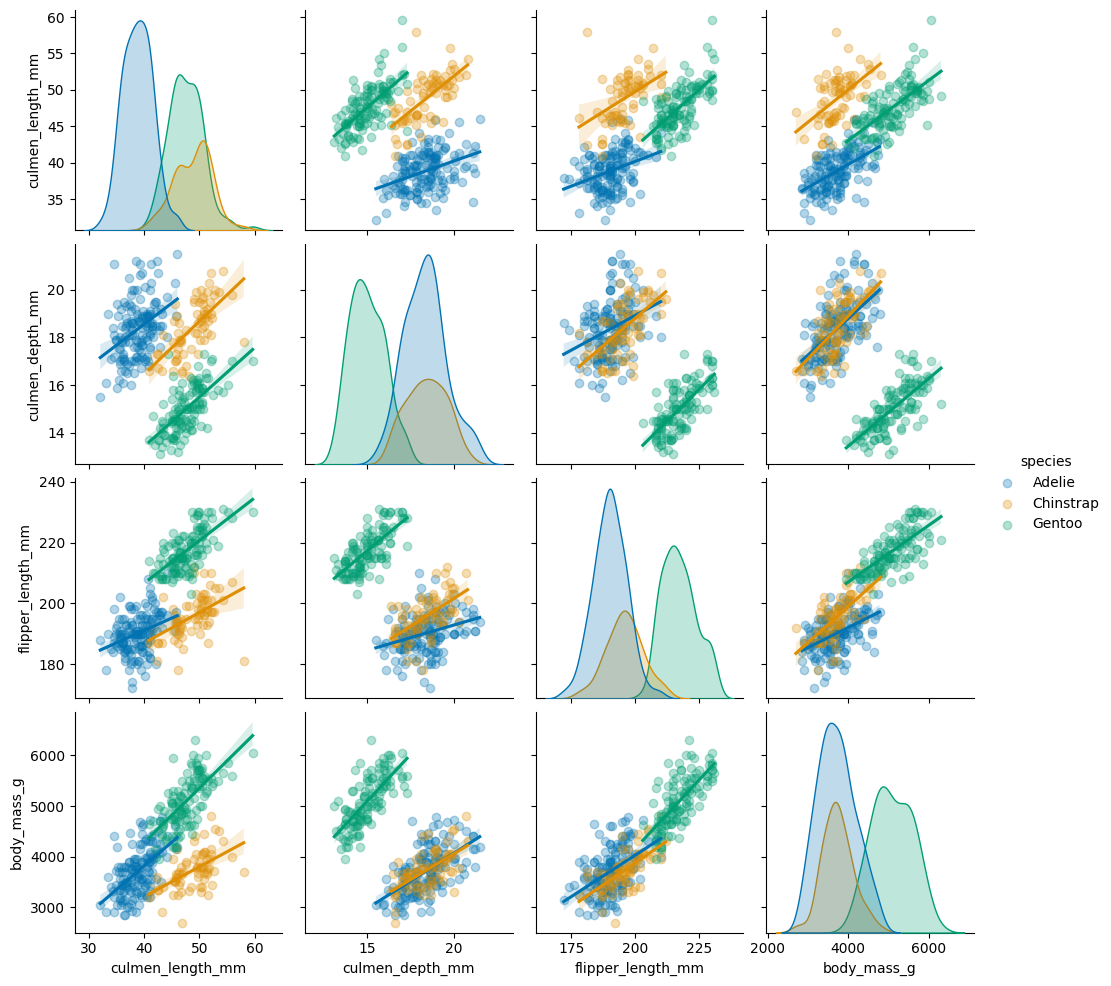

In [32]:
sns.pairplot(cleaned_data,hue="species",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})
plt.show()

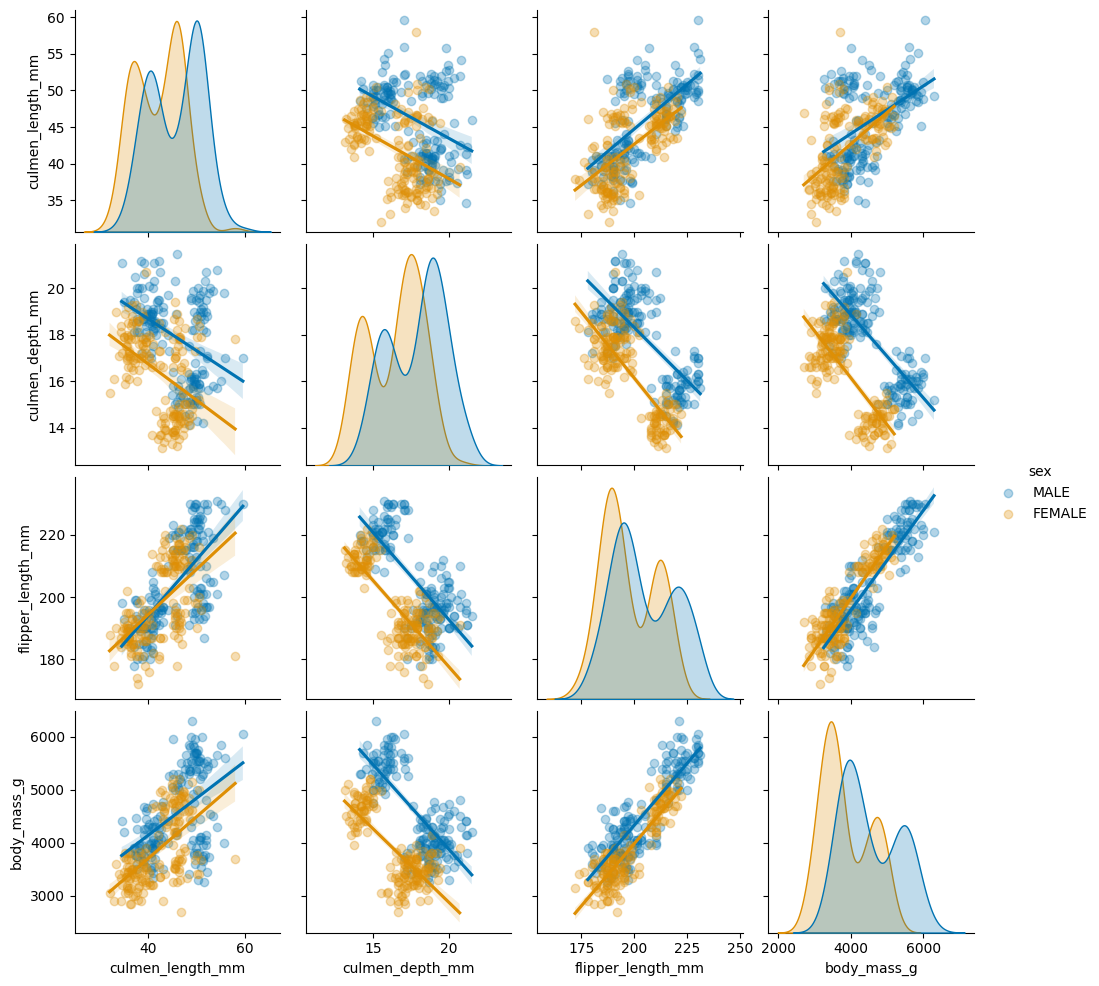

In [33]:
sns.pairplot(cleaned_data,hue="sex",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})
plt.show()

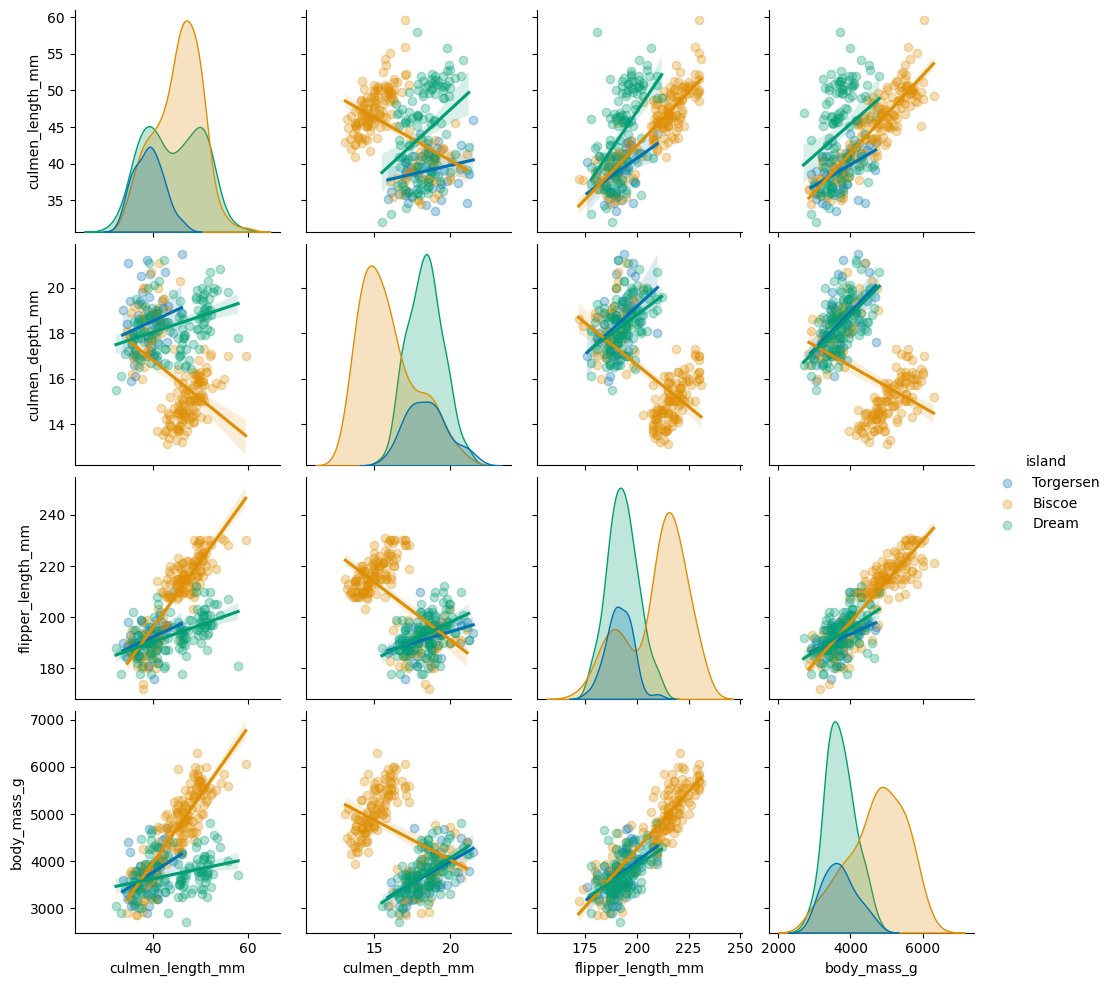

In [34]:
sns.pairplot(cleaned_data,hue="island",kind="reg",plot_kws={"scatter_kws":{"alpha":0.3}})
plt.show()